In [1]:
import pandas as pd
# load data 
Fraud_dataset = pd.read_csv("C://CODSOFT/Credit_Card_Fraud_Detection/creditcard.csv")

In [2]:
# Display the first ten rows
Fraud_dataset.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [3]:
# Starting Exploratory Data Analysis
# describe the data
print(Fraud_dataset.describe())
# Check for basic info
print(Fraud_dataset.info())
# Check for missing values
print(Fraud_dataset.isna().sum())
# check for duplicate values
duplicates = Fraud_dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
# drop duplicate values
Fraud_dataset = Fraud_dataset.drop_duplicates()
# print("New shape after dropped duplicates :".format(Fraud_dataset.shape))
print("New shape after dropping duplicates:", Fraud_dataset.shape)

New shape after dropping duplicates: (283726, 31)


In [5]:
# class distribution
print("Class value counts:")
print(Fraud_dataset["Class"].value_counts())

Class value counts:
Class
0    283253
1       473
Name: count, dtype: int64


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Seperate into features and target variables
X = Fraud_dataset.drop("Class", axis= 1)
y = Fraud_dataset["Class"]

# Scale amount 
scaler = StandardScaler()
X["Amount"] = scaler.fit_transform(X[["Amount"]])
#  splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=42, stratify=y)

# Handling class imbalance
smote = SMOTE(random_state= 42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)
print("Original class distribution:\n", y_train.value_counts())
print("After SMOTE:\n", pd.Series(y_train_sm).value_counts())

Original class distribution:
 Class
0    56650
1       95
Name: count, dtype: int64
After SMOTE:
 Class
0    56650
1    56650
Name: count, dtype: int64


In [7]:
# Training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# initializing model
rf_model = RandomForestClassifier(random_state= 42, n_jobs=-1)
rf_model.fit(X_train_sm, y_train_sm)
# predict on test cell
y_pred= rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]
y_prob = (y_prob > 0.38).astype(int)

In [8]:
from sklearn.metrics import classification_report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226603
           1       0.87      0.79      0.83       378

    accuracy                           1.00    226981
   macro avg       0.94      0.89      0.91    226981
weighted avg       1.00      1.00      1.00    226981

ROC AUC Score: 0.919153301159497


AUPRC (Precision-Recall AUC): 0.8269015546461558


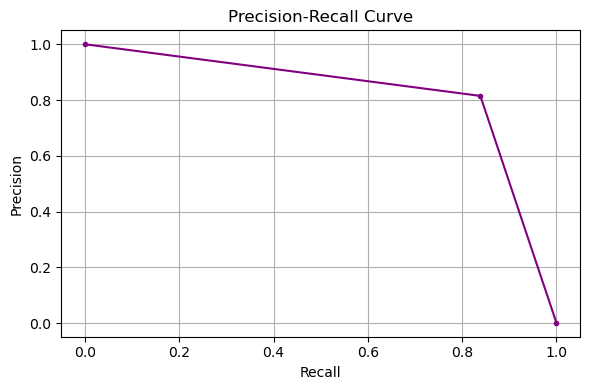

In [9]:
# analysing via precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

print("AUPRC (Precision-Recall AUC):", pr_auc)

# Plotting the PR Curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, marker='.', color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.tight_layout()
# plt.savefig('images/pr_curve.png')
plt.show()


In [10]:
# tuning parameters
from sklearn.model_selection import RandomizedSearchCV
# define param_grid
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}



In [11]:
#initialize model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

In [12]:
# Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, scoring='average_precision', cv=3, verbose=2, random_state=42, n_jobs=-1)

In [13]:
# Fit on SMOTE balanced data
random_search.fit(X_train_sm, y_train_sm)

# Get best model
best_model = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


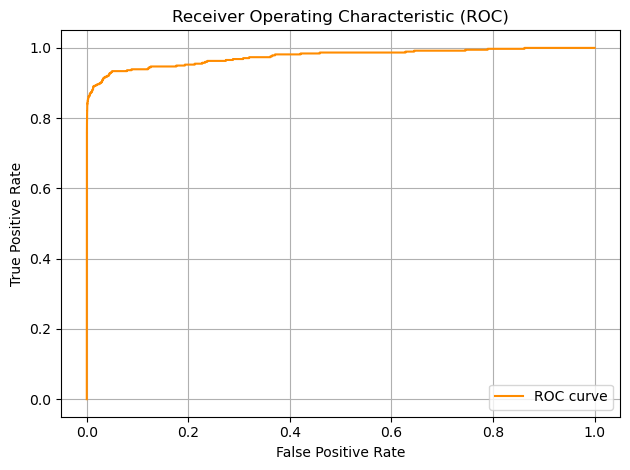

In [ ]:
from sklearn.metrics import roc_curve

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


In [15]:
import joblib
joblib.dump(rf_model, "Fraud_Detection_Model.pkl")

['Fraud_Detection_Model.pkl']